In [1]:
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

In [2]:
sys.path.append("../../src")
from models import MLP
from data import gen_rnd_ds
from losses import LinearClassification, SquaredClassification
from block_analysis import *
from derivation import get_hessian_grad_block, block_norm
from lr_tools import lr_calibrate

## TODO: 

### Need a working LR calibration: Fuse-kun

### Explore depth/width impact

###  Align with other analysis

## Params

In [3]:
# Model
mode = "relu"
bias = False
nlayer = 10
inp_dim = 10 
out_dim = 10
hid_dim = 100

# Data parameters
nsamp = 100
inp_mean = 0
inp_var = 1

# Others
device = 0
lr = 1

In [4]:
model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
               out_dim, nsamp, device)
loss_fn = SquaredClassification(out_dim)

In [7]:
H,g = block_hessian(model, ds, loss_fn, 10**-2)

In [9]:
x,y = ds[0]

### Squared loss

In [5]:
lr = lr_calibrate(model, ds, loss_fn)

LR -8.00E+00 	 || Delta=-1.51E+23	 ||Error=5.60E+14  	|| hoe=4.72E+21 	|| H=8.43E+06	||ratio=5.60E+14
LR -7.00E+00 	 || Delta=-1.61E+22	 ||Error=1.01E+14  	|| hoe=6.59E+20 	|| H=6.52E+06	||ratio=1.01E+14
LR -6.00E+00 	 || Delta=-1.26E+21	 ||Error=1.45E+13  	|| hoe=7.02E+19 	|| H=4.86E+06	||ratio=1.45E+13
LR -5.00E+00 	 || Delta=-6.55E+19	 ||Error=1.52E+12  	|| hoe=5.24E+18 	|| H=3.44E+06	||ratio=1.52E+12
LR -4.00E+00 	 || Delta=-1.91E+18	 ||Error=1.06E+11  	|| hoe=2.39E+17 	|| H=2.26E+06	||ratio=1.06E+11
LR -3.00E+00 	 || Delta=-2.37E+16	 ||Error=3.95E+09  	|| hoe=5.27E+15 	|| H=1.33E+06	||ratio=3.95E+09
LR -2.00E+00 	 || Delta=-7.08E+13	 ||Error=5.44E+07  	|| hoe=3.54E+13 	|| H=6.51E+05	||ratio=5.44E+07
LR -1.00E+00 	 || Delta=-1.20E+10	 ||Error=1.14E+05  	|| hoe=2.40E+10 	|| H=2.11E+05	||ratio=1.14E+05
LR 0.00E+00 	 || Delta=0.00E+00	 ||Error=NAN  	|| hoe=NAN 	|| H=NAN	||ratio=NAN
LR 1.00E+00 	 || Delta=-1.05E+03	 ||Error=7.89E+00  	|| hoe=2.35E+03 	|| H=-3.41E+02	||ratio=-6.89E+00
L

../../src/lr_tools.py:36: RuntimeWarning: invalid value encountered in less
  diff = abs(diff)<1e-4


ValueError: attempt to get argmin of an empty sequence

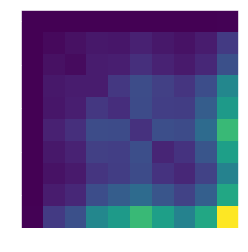

In [11]:
lr = .001
H, _ = block_hessian(model, ds, loss_fn, lr=lr)
plt.imshow(H.abs().cpu().numpy())

### Linear loss

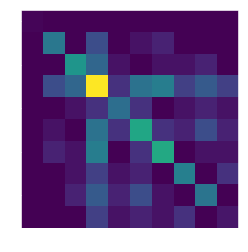

In [8]:
model =  MLP(inp_dim, hid_dim, out_dim, nlayer, bias, mode).cuda(device)
ds = gen_rnd_ds(inp_dim, inp_mean, inp_var, 
               out_dim, nsamp, device)
loss_fn = SquaredClassification(out_dim)

model, ds, loss_fn = get_model_ds_loss()
H = block_hessian(model, ds, loss_fn, lr=0.001)
plt.imshow(H.abs())